In [53]:
import matplotlib
import matplotlib.pyplot as pt
%matplotlib inline
matplotlib.style.use('ggplot')

import torch.optim as optim

from envs.my_mdp import StochasticMDPEnv
from envs.tetris import Tetris
from agents.my_hdqn_agent import hDQN, OptimizerSpec
from my_hdqn_learning import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
NUM_EPISODES = 100000
# NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(20000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
    num_goal=4,
    num_action=4 * 4
)

env = Tetris(10, 4)
# env = StochasticMDPEnv()

In [55]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:190: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(current_Q_values, target_Q_values)
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:122: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return self.meta_controller(Variable(state, volatile=True)).data.max(1)[1].cpu()
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:157: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(current_Q_values, target_Q_values)
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:131: UserWarning: volatile was removed and now has no effect. 

steps:   2552 episode:   1000 reward: 0.0 average: 7.43
goals_selection: [225. 230. 243. 330.]
steps:   5127 episode:   2000 reward: 0.0 average: 7.54
goals_selection: [220. 236. 199. 380.]
steps:   7642 episode:   3000 reward: 0.0 average: 7.27
goals_selection: [189. 183. 213. 439.]
steps:  10119 episode:   4000 reward: 0.0 average: 7.04
goals_selection: [182. 145. 191. 496.]
steps:  12598 episode:   5000 reward: 0.0 average: 7.18
goals_selection: [168. 141. 186. 529.]
steps:  14782 episode:   6000 reward: 0.0 average: 6.93
goals_selection: [148. 106. 222. 541.]
steps:  17145 episode:   7000 reward: 80.0 average: 6.79
goals_selection: [127.  79. 185. 618.]
steps:  19356 episode:   8000 reward: 0.0 average: 6.59
goals_selection: [170.  49. 168. 629.]
steps:  21617 episode:   9000 reward: 0.0 average: 6.33
goals_selection: [134.  33. 167. 679.]
steps:  23771 episode:  10000 reward: 40.0 average: 6.17
goals_selection: [171.  38. 140. 669.]
steps:  25817 episode:  11000 reward: 0.0 averag

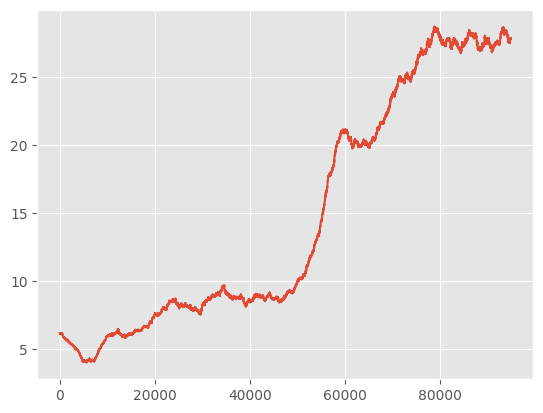

In [58]:
import numpy as np
episode_returns = stats.episode_rewards
window_size = 5000
moving_average = np.convolve(episode_returns, np.ones(window_size), 'valid') / window_size
pt.plot(moving_average)
pt.savefig('moving_average')
# print(sum(stats.episode_rewards))
# plot_episode_stats(stats)